<a href="https://colab.research.google.com/github/Cru1zzz3/python-parallel-programming-cookbook/blob/main/Python_Parallel_Programming_(Lab_3)_Udartsev_Stanislav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to spawn a process**

Для создания процессов используется библиотека multithreading

In [1]:
import multiprocessing

def foo(i):
  print ('called function in process: %s' %i)
  return

if __name__ == '__main__':
  Process_jobs = []
  for i in range(5):
    p = multiprocessing.Process(target=foo, args=(i,))
    Process_jobs.append(p)
    p.start()
    p.join()


called function in process: 0
called function in process: 1
called function in process: 2
called function in process: 3
called function in process: 4


**How to name a process**

Процесс обращения к имени процесса схож с тем, что был во второй главе во время обращения к имени потока.

In [2]:
import multiprocessing
import time

def foo():
  name = multiprocessing.current_process().name
  print("Starting %s \n" %name)
  time.sleep(3)
  print("Exiting %s \n %name")

if __name__ == '__main__':
  process_with_name = multiprocessing.Process(name='foo_process', target=foo)
  process_with_name.daemon = True
  process_with_default_name = multiprocessing.Process(target=foo)
  process_with_name.start()
  process_with_default_name.start()

Starting foo_process 
Starting Process-7 




**How to run a process in the background**

Создание просцесса демона с помощью обращания к атрибуту.daemon = True означает, что подпроцесс автоматически завершается после завершения родительского процесса, чтобы предотвратить несвязанные процессы можно добавив метод .join() после метода .start(), чтобы родительский процесс не заканчивался раньше дочернего процесса; вместо этого родительский процесс будет ждать завершения дочернего процесса.

In [3]:
import multiprocessing
import time

def foo():
 name = multiprocessing.current_process().name
 print ("Starting %s \n" %name)
 time.sleep(3)
 print ("Exiting %s \n" %name)

if __name__ == '__main__':
  background_process = multiprocessing.Process(name='background_process', target=foo)
  background_process.daemon = True

  NO_background_process = multiprocessing.Process(name='NO_background_process', target=foo)
  NO_background_process.daemon = False

  background_process.start()
  NO_background_process.start()
  
  background_process.join()
  NO_background_process.join()



Starting background_process 
Starting NO_background_process 


Exiting NO_background_process 
Exiting background_process 




**How to kill a process**

Опрос статуса процесса можно с помощью метода .is_alive(). Убить процесс с помощью метода .terminate()    

In [4]:
import multiprocessing
import time

def foo():
 print ('Starting function')
 time.sleep(0.1)
 print ('Finished function')

if __name__ ==  '__main__':
  p = multiprocessing.Process(target=foo)
  print ('Process before execution:', p, p.is_alive())
  p.start()
  print ('Process running:', p, p.is_alive())
  p.terminate()
  print ('Process terminated:', p, p.is_alive())
  p.join()
  print ('Process joined:', p, p.is_alive())
  print ('Process exit code:', p.exitcode)


Process before execution: <Process(Process-10, initial)> False
Process running: <Process(Process-10, started)> True
Process terminated: <Process(Process-10, started)> True
Process joined: <Process(Process-10, stopped[SIGTERM])> False
Process exit code: -15


**How to use a process in a subclass**

Наследование от класса Proccess аналогично наследованию от класса Thread представленному в прошлой главе

In [5]:
import multiprocessing

class MyProcess(multiprocessing.Process):
  def run(self):
    print ('called run method in process: %s' %self.name)
    return

if __name__ == '__main__':
 jobs = []
 for i in range(5):
  p = MyProcess ()
  jobs.append(p)
  p.start()
  p.join()

called run method in process: MyProcess-11
called run method in process: MyProcess-12
called run method in process: MyProcess-13
called run method in process: MyProcess-14
called run method in process: MyProcess-15


**How to exchange objects between
processes**

Обмен объектами с помощью очереди между процессами  схож с представленным  в прошлой главе обмен объектами с помощью очереди между потоками

In [6]:
import multiprocessing
import random
import time

class producer(multiprocessing.Process):
  def __init__(self, queue):
    multiprocessing.Process.__init__(self)
    self.queue = queue
    
  def run(self) :
    for i in range(10):
      item = random.randint(0, 256)
      self.queue.put(item)
      print ("Process Producer : item %d appended to queue %s" % (item,self.name))
      time.sleep(1)
      print ("The size of queue is %s" % self.queue.qsize())

class consumer(multiprocessing.Process):
  def __init__(self, queue):
    multiprocessing.Process.__init__(self)
    self.queue = queue

  def run(self):
    while True:
      if (self.queue.empty()):
        print("the queue is empty")
        break
      else :
        time.sleep(2)
        item = self.queue.get()
        print ('Process Consumer : item %d popped from by %s \n' % (item, self.name))
        time.sleep(1)

if __name__ == '__main__':
  queue = multiprocessing.Queue()
  process_producer = producer(queue)
  process_consumer = consumer(queue)
  process_producer.start()
  process_consumer.start()
  process_producer.join()
  process_consumer.join()



Process Producer : item 58 appended to queue producer-16
The size of queue is 1
Process Producer : item 120 appended to queue producer-16
Process Consumer : item 58 popped from by consumer-17 

The size of queue is 1
Process Producer : item 204 appended to queue producer-16
The size of queue is 2
Process Producer : item 253 appended to queue producer-16
The size of queue is 3
Process Producer : item 175 appended to queue producer-16
Process Consumer : item 120 popped from by consumer-17 

The size of queue is 3
Process Producer : item 73 appended to queue producer-16
The size of queue is 4
Process Producer : item 170 appended to queue producer-16
The size of queue is 5
Process Producer : item 71 appended to queue producer-16
Process Consumer : item 204 popped from by consumer-17 

The size of queue is 5
Process Producer : item 75 appended to queue producer-16
The size of queue is 6
Process Producer : item 252 appended to queue producer-16
The size of queue is 7
Process Consumer : item 

2. Using pipes to exchange objects 

Объект Pipe представляет собой удобный инструмент для двустороннего обмена данными между процессами 

In [7]:
import multiprocessing

def create_items(pipe):
  output_pipe, _ = pipe
  for item in range(10):
    output_pipe.send(item)
  output_pipe.close()

def multiply_items(pipe_1, pipe_2):
  close, input_pipe = pipe_1
  close.close()
  output_pipe, _ = pipe_2
  try:
    while True:
      item = input_pipe.recv()
      output_pipe.send(item * item)
  except EOFError:
    output_pipe.close()

if __name__== '__main__':
  #First process pipe with numbers from 0 to 9
  pipe_1 = multiprocessing.Pipe(True)
  process_pipe_1 = multiprocessing.Process(target=create_items, args=(pipe_1,))
  process_pipe_1.start()
  #second pipe,
  pipe_2 = multiprocessing.Pipe(True)
  process_pipe_2 = multiprocessing.Process(target=multiply_items, args=(pipe_1, pipe_2,))
  process_pipe_2.start()
  pipe_1[0].close()
  pipe_2[0].close()
  try:
    while True:
      print(pipe_2[1].recv())
  except EOFError:
    print("End")

0
1
4
9
16
25
36
49
64
81
End


**How to synchronize processes**

Примитивы синхронизации очень похожи на те, которые встречались в прошлой лабораторной работе при использовании библиотеки multithreading. Добавляется новый примитив синхронизации Barrier. Процессы могут продолжить свою работу, только при достижении порогового значения барьера, таким образом можно добиться синхронизации. 

В примере из книги значения времени при достижении барьерного значения 

In [8]:
import multiprocessing
from multiprocessing import Barrier, Lock, Process
from time import time
from datetime import datetime

def test_with_barrier(synchronizer, serializer):
  name = multiprocessing.current_process().name
  synchronizer.wait()
  now = time()
  with serializer:
    print("process %s ----> %s" %(name,datetime.fromtimestamp(now)))

def test_without_barrier():
  name = multiprocessing.current_process().name
  now = time()
  print("process %s ----> %s" %(name ,datetime.fromtimestamp(now)))

if __name__ == '__main__':
  synchronizer = Barrier(2)
  serializer = Lock()
  Process(name='p1 - test_with_barrier', target=test_with_barrier, args=(synchronizer, serializer)).start()
  Process(name='p2 - test_with_barrier', target=test_with_barrier, args=(synchronizer, serializer)).start()
  Process(name='p3 - test_without_barrier', target=test_without_barrier).start()
  Process(name='p4 - test_without_barrier', target=test_without_barrier).start()





process p1 - test_with_barrier ----> 2021-11-23 13:09:23.965643
process p2 - test_with_barrier ----> 2021-11-23 13:09:23.971558
process p3 - test_without_barrier ----> 2021-11-23 13:09:23.982636
process p4 - test_without_barrier ----> 2021-11-23 13:09:23.993535


**How to manage a state between processes**

Благодаря объекту Manager() данные могут быть доступны между несколькими процессами. В нашем случае объектом данных выступает словарь, доступный каждому процессу, значения которого вычисляются внутри каждого из процессов.

In [9]:
import multiprocessing

def worker(dictionary, key, item):
  dictionary[key] = item
  print("key = ", key, "value = ", item)

if __name__ == "__main__":
  mgr = multiprocessing.Manager()
  dictionary = mgr.dict()
  jobs = [multiprocessing.Process(target=worker, args=(dictionary, i, i*2)) for i in range(10)]
  for j in jobs: 
    j.start()
  for j in jobs:
    j.join()
  print("Results:", dictionary)

key =  0 value =  0
key =  2 value =  4
key =  1 value =  2
key =  4 value =  8
key =  3 value =  6
key =  5 value =  10
key =  6 value =  12
key =  7 value =  14
key =  8 value =  16
key =  9 value =  18
Results: {1: 2, 0: 0, 2: 4, 3: 6, 4: 8, 5: 10, 7: 14, 6: 12, 8: 16, 9: 18}


**How to use a process pool**

Использования объекта Pool() позволяет выполнять вычисление функции параллельно, задавая необходимое параллельных процессов в пуле процессов. Для пула процессов можно применять метод  одноимённый встроенной функции .map(), которая применяет функцию к каждому элементу итерируемого объекта, но делает это параллельно.

In [10]:
def function_square(data):
  result = data*data
  return result

if __name__ == '__main__':
  inputs = list(range(100))
  pool = multiprocessing.Pool(processes=4)
  pool_outputs = pool.map(function_square, inputs)
  pool.close()
  pool.join()
  print ('Pool :', pool_outputs)

Pool : [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


**Using the mpi4py Python module**

Модуль mpi4py представляет собой обётку над библиотека языка С под названием MPI, котороая позволяет устанавливать взаимодействие процессов с использованием сообщений 

In [11]:
!pip install mpi4py

In [12]:
from google.colab import files

def helloWorld_MPI():
  """
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
print ('hello world from process ', rank)
  """
# helloWorld_MPI.py
with open('/content/helloWorld_MPI.py', 'w') as f:
  f.write(helloWorld_MPI.__doc__)

! mpiexec --allow-run-as-root -n 5 python /content/helloWorld_MPI.py

hello world from process  2
hello world from process  3
hello world from process  4
hello world from process  1
hello world from process  0


**Point-to-point communication**

Общение между процессами в mpi4py можно с помощью point-to-point, оно подразумевает отправление и получение данных с явным указанием получателя  и отправляемых данных .send(data,dest) и отправителя .recv(source), соответственно.

In [13]:
def pointToPointCommunication():
  """
from mpi4py import MPI

comm=MPI.COMM_WORLD
rank = comm.rank
print("my rank is : ", rank)

if rank==0:
  data = 10000000
  destination_process = 4
  comm.send(data,dest=destination_process)
  print ("sending data %s " %data + "to process %d" %destination_process)

if rank==1:
  destination_process = 8
  data= "hello"
  comm.send(data,dest=destination_process)
  print ("sending data %s :" %data + "to process %d" %destination_process)

if rank==4:
  data=comm.recv(source=0)
  print ("data received is = %s" %data)

if rank==8:
  data1=comm.recv(source=1)
  print ("data1 received is = %s" %data1)

  """
  return 0

  
# pointToPointCommunication.py
with open('/content/pointToPointCommunication.py', 'w') as f:
  f.write(pointToPointCommunication.__doc__)

! mpiexec --allow-run-as-root -n 9 python /content/pointToPointCommunication.py

my rank is :  2
my rank is :  3
my rank is :  5
my rank is :  1
my rank is :  8
my rank is :  7
sending data hello :to process 8
my rank is :  4
my rank is :  6
my rank is :  0
sending data 10000000 to process 4
data1 received is = hello
data received is = 10000000


**Avoiding deadlock problems**

В примере из книги опечатка, показан пример без взаимной блокировки.

Взаимной блокировки при использовании метода общения point-to-point можно избежать используя неблокирующий порядок отправления/получения сообщения, либо с использованием метода comm.sendrecv(data_send,dest=destination_process,
source=source_process), объединяюзий отправление и ожидание ответа от другого процесса.

In [14]:

def deadLockProblems():
  """
from mpi4py import MPI

comm=MPI.COMM_WORLD
rank = comm.rank
print("my rank is : " , rank)

if rank==1:
  data_send= "a"
  destination_process = 5
  source_process = 5

  data_received=comm.recv(source=source_process)
  comm.send(data_send,dest=destination_process)

  print ("sending data %s :" %data_send + " to process %d" %destination_process)
  print ("data received is = %s" %data_received)

if rank==5:
  data_send= "b"
  destination_process = 1
  source_process = 1

  data_received=comm.recv(source=source_process)
  comm.send(data_send,dest=destination_process)

  print ("sending data %s :" %data_send + " to process %d" %destination_process)
  print ("data received is = %s" %data_received)
  """

# deadLockProblems.py
with open('/content/deadLockProblems.py', 'w') as f:
  f.write(deadLockProblems.__doc__)

! mpiexec --allow-run-as-root -n 9 python /content/deadLockProblems.py

my rank is :  8
my rank is :  5
my rank is :  3
my rank is :  7
my rank is :  1
my rank is :  2
my rank is :  6
my rank is :  4
my rank is :  0


In [15]:
def deadLockNoProblems1():
  """
from mpi4py import MPI

comm=MPI.COMM_WORLD
rank = comm.rank
print("my rank is : " , rank)

if rank==1:
  data_send= "a"
  destination_process = 5
  source_process = 5

  comm.send(data_send,dest=destination_process)
  data_received=comm.recv(source=source_process)

  print ("sending data %s :" %data_send + " to process %d" %destination_process)
  print ("data received is = %s" %data_received)

if rank==5:
  data_send= "b"
  destination_process = 1
  source_process = 1

  data_received=comm.recv(source=source_process)
  comm.send(data_send,dest=destination_process)

  print ("sending data %s :" %data_send + " to process %d" %destination_process)
  print ("data received is = %s" %data_received)
  """

# deadLockProblems.py
with open('/content/deadLockNoProblems1.py', 'w') as f:
  f.write(deadLockNoProblems1.__doc__)

! mpiexec --allow-run-as-root -n 9 python /content/deadLockNoProblems1.py

my rank is :  3
my rank is :  0
my rank is :  8
my rank is :  5
my rank is :  6
my rank is :  4
my rank is :  1
sending data b : to process 1
data received is = a
sending data a : to process 5
my rank is :  2
data received is = b
my rank is :  7


In [16]:
def deadLockNoProblems2():
  """
from mpi4py import MPI

comm=MPI.COMM_WORLD
rank = comm.rank
print("my rank is : " , rank)

if rank==1:
  data_send= "a"
  destination_process = 5
  source_process = 5

  data_received=comm.sendrecv(data_send,dest=destination_process, source =source_process)

  print ("sending data %s :" %data_send + " to process %d" %destination_process)
  print ("data received is = %s" %data_received)

if rank==5:
  data_send= "b"
  destination_process = 1
  source_process = 1

  data_received=comm.sendrecv(data_send,dest=destination_process, source=source_process)
  print ("sending data %s :" %data_send + " to process %d" %destination_process)
  print ("data received is = %s" %data_received)
  """

# deadLockProblems.py
with open('/content/deadLockNoProblems2.py', 'w') as f:
  f.write(deadLockNoProblems2.__doc__)

! mpiexec --allow-run-as-root -n 9 python /content/deadLockNoProblems2.py

my rank is :  2
my rank is :  0
my rank is :  3
my rank is :  4
my rank is :  5
my rank is :  1
sending data a : to process 5
sending data b : to process 1
data received is = a
data received is = b
my rank is :  8
my rank is :  7
my rank is :  6


**Collective communication using broadcast**

Благодаря широковещательному механизму .bcast(), можно задавать корневой элемент, который будет являться источником данных для других процессов.

In [17]:
def broadcast():
  """
from mpi4py import MPI
  
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
  variable_to_share = 100

else:
  variable_to_share = None

variable_to_share = comm.bcast(variable_to_share, root=0)

print("process = %d" %rank + " variable shared = %d " %variable_to_share)
  """
  
with open('/content/broadcast.py', 'w') as f:
  f.write(broadcast.__doc__)

! mpiexec --allow-run-as-root -n 10 python /content/broadcast.py


process = 8 variable shared = 100 
process = 4 variable shared = 100 
process = 0 variable shared = 100 
process = 2 variable shared = 100 
process = 6 variable shared = 100 
process = 1 variable shared = 100 
process = 5 variable shared = 100 
process = 3 variable shared = 100 
process = 9 variable shared = 100 
process = 7 variable shared = 100 


**Collective communication using scatter**

Работа метода .scatter() очень похожа на широковещательную передачу, но имеет одно существенное отличие, в
то время как comm.bcast отправляет одни и те же данные всем процессам прослушивания, comm.scatter может
отправлять фрагменты данных в массиве различным процессам.

В примере из учебника сделана ошибка. Вместо вывода значения полученного из буфера, написан вывод общедоступного массива. В случае, когда rank процесса не равен корневому процессу (rank=0), то значение общего массива array_to_share становится None, что приводит к ошибке целочисленного вывода и является логической ошибкой в выводе recvbuf = %d.

In [18]:
def scatter():
  """
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
  array_to_share = [1, 2, 3, 4 ,5 ,6 ,7, 8 ,9 ,10]
else:
  array_to_share = None

recvbuf = comm.scatter(array_to_share, root=0)
print("process = %d" % rank + " recvbuf = %d " %recvbuf)
  """
  
with open('/content/scatter.py', 'w') as f:
  f.write(scatter.__doc__)

! mpiexec --allow-run-as-root -n 10 python /content/scatter.py

process = 0 recvbuf = 1 
process = 8 recvbuf = 9 
process = 6 recvbuf = 7 
process = 1 recvbuf = 2 
process = 5 recvbuf = 6 
process = 4 recvbuf = 5 
process = 9 recvbuf = 10 
process = 3 recvbuf = 4 
process = 2 recvbuf = 3 
process = 7 recvbuf = 8 


**Collective communication using gather**

Метод .gather() выполняет функцию, обратную .scatter(). Корневой процесс является собирателем данных, с других процессов.

In [19]:
def gather():
  """
from mpi4py import MPI

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()
data = (rank+1)**2

data = comm.gather(data, root=0)
if rank == 0:
  print ("rank = %s " %rank + "...receiving data to other process")
  for i in range(1,size):
    data[i] = (i+1)**2
    value = data[i]
    print(" process %s receiving %s from process %s" %(rank , value , i))
  """
  
with open('/content/gather.py', 'w') as f:
  f.write(gather.__doc__)

! mpiexec --allow-run-as-root -n 5 python /content/gather.py

rank = 0 ...receiving data to other process
 process 0 receiving 4 from process 1
 process 0 receiving 9 from process 2
 process 0 receiving 16 from process 3
 process 0 receiving 25 from process 4


**Collective communication using Alltoall**

Метод .alltoall() берет i-й объект из sendbuf задачи j и копирует его в j-й объект аргумента recvbuf задачи i.

In [20]:
def alltoall():
  """
from mpi4py import MPI
import numpy

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

a_size = 1
senddata = (rank+1)*numpy.arange(size,dtype=int)
recvdata = numpy.empty(size*a_size,dtype=int)
comm.Alltoall(senddata,recvdata)

print(" process %s sending %s receiving %s" %(rank , senddata , recvdata))
  """
  
with open('/content/alltoall.py', 'w') as f:
  f.write(alltoall.__doc__)

! mpiexec --allow-run-as-root -n 5 python /content/alltoall.py

 process 0 sending [0 1 2 3 4] receiving [0 0 0 0 0]
 process 2 sending [ 0  3  6  9 12] receiving [ 2  4  6  8 10]
 process 1 sending [0 2 4 6 8] receiving [1 2 3 4 5]
 process 3 sending [ 0  4  8 12 16] receiving [ 3  6  9 12 15]
 process 4 sending [ 0  5 10 15 20] receiving [ 4  8 12 16 20]


**The reduction operation**

Основнная суть операции reduction - сокращение данных, которая включает в себя сокращение набора чисел до меньшего набора чисел с помощью определённого набора операций (MPI.MAX/MIN/SUM/PROD/LAND/MAXLOC/MINLOC).

В тексте учебника опечатка, переменная a_size взята из предыдущего упражнения. В данном примере следует использовать переменную array_size

In [21]:
def reduction2():
  """
import numpy
import numpy as np
from mpi4py import MPI

comm = MPI.COMM_WORLD
size = comm.size
rank = comm.rank

array_size = 3
recvdata = numpy.zeros(array_size,dtype=numpy.int)
senddata = (rank+1)*numpy.arange(array_size,dtype=numpy.int)
print(" process %s sending %s " %(rank , senddata))
comm.Reduce(senddata,recvdata,root=0,op=MPI.SUM)
print ('on task',rank,'after Reduce: data = ',recvdata)
  """
  
with open('/content/reduction2.py', 'w') as f:
  f.write(reduction2.__doc__)

! mpiexec --allow-run-as-root -n 3 python /content/reduction2.py

 process 0 sending [0 1 2] 
 process 2 sending [0 3 6] 
on task 2 after Reduce: data =  [0 0 0]
 process 1 sending [0 2 4] 
on task 0 after Reduce: data =  [ 0  6 12]
on task 1 after Reduce: data =  [0 0 0]


**How to optimize communication**

Для оптимизации коммуникации используются различные виртуальные топологии, что в свою очередь  позволяет коду быть более четким и читаемым.

В данном примере реализована декартова топологию размером M×N. Кроме того,
здесь определены набор координат, чтобы лучше понять, как расположены все процессы. Декартова топология выглядит следующим образом:

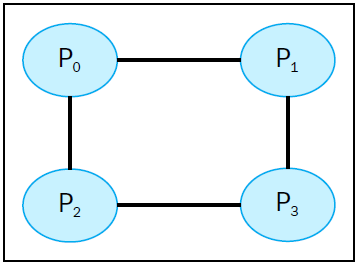

Вывод данного примера отличается от вывода в примере из книги. Соседние значения справа/слева и вверх/вниз не принимают значения -1, потому что при использовании метода .Shift() в качестве входных парамтеров используются направление движения вдоль измерения/оси в декартовой топологии, а такаже величина сдвига. Поэтому соседи справа/слева и сверху/снизу будут являться одним и тем же номером процесса, а не отрицательным числом.

In [22]:
def virtualTopology():
  """
from mpi4py import MPI
import numpy as np

UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
neighbour_processes = [0,0,0,0]

if __name__ == "__main__":
  comm = MPI.COMM_WORLD
  rank = comm.rank
  size = comm.size

  grid_rows = int(np.floor(np.sqrt(comm.size)))
  grid_column = comm.size // grid_rows

  if grid_rows*grid_column > size:
    grid_column -= 1

  if grid_rows*grid_column > size:
    grid_rows -= 1

  if (rank == 0) :
    print("Building a %d x %d grid topology:" % (grid_rows, grid_column))
  
  cartesian_communicator = comm.Create_cart((grid_rows, grid_column), periods=(True, True), reorder=True) 
  my_mpi_row, my_mpi_col = cartesian_communicator.Get_coords( cartesian_communicator.rank )

  neighbour_processes[UP], neighbour_processes[DOWN] = cartesian_communicator.Shift(0,1)
  neighbour_processes[LEFT], neighbour_processes[RIGHT] = cartesian_communicator.Shift(1,1)

  print ("Process = %s row = %s column = %s ----> \
   neighbour_processes[UP] = %s \
   neighbour_processes[DOWN] = %s \
   neighbour_processes[LEFT] =%s \
   neighbour_processes[RIGHT]=%s" \
   %(rank, my_mpi_row, my_mpi_col,neighbour_processes[UP], neighbour_processes[DOWN], neighbour_processes[LEFT] , neighbour_processes[RIGHT]))
"""

  
with open('/content/virtualTopology.py', 'w') as f:
  f.write(virtualTopology.__doc__)

! mpiexec --allow-run-as-root -n 4 python /content/virtualTopology.py  

Building a 2 x 2 grid topology:
Process = 0 row = 0 column = 0 ---->    neighbour_processes[UP] = 2    neighbour_processes[DOWN] = 2    neighbour_processes[LEFT] =1    neighbour_processes[RIGHT]=1
Process = 2 row = 1 column = 0 ---->    neighbour_processes[UP] = 0    neighbour_processes[DOWN] = 0    neighbour_processes[LEFT] =3    neighbour_processes[RIGHT]=3
Process = 1 row = 0 column = 1 ---->    neighbour_processes[UP] = 3    neighbour_processes[DOWN] = 3    neighbour_processes[LEFT] =0    neighbour_processes[RIGHT]=0
Process = 3 row = 1 column = 1 ---->    neighbour_processes[UP] = 1    neighbour_processes[DOWN] = 1    neighbour_processes[LEFT] =2    neighbour_processes[RIGHT]=2
